In [1]:
# Tested with kernel "LCLS-I py3"

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline 
%config InlineBackend.figure_format ='retina'

In [2]:
pwd

'/cds/home/b/bwt/gued_test_data'

In [3]:
from ued_data_analysis import file_to_h5, ord_dict, UED_Exp, find_center

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
from matplotlib.patches import Arrow, Circle
from scipy import optimize

In [7]:
fileloader = file_to_h5(path_data='/cds/home/b/bwt/gued_test_data', folder_key="images-ANDOR1")

folder: images-ANDOR1
path: /cds/home/b/bwt/gued_test_data
found 364 files


In [8]:
# prints parsed info, filename and total intensity of first 5 and last 5 images
# Set activate_save=False if run has ended and h5 was already created. Otherwise h5 will be overwritten!
fileloader.load_and_save_h5(activate_save=True, name_h5="ued_test_3")

['001', '69.81800000'] ANDOR1_Delay-001-69.81800000_20200305_002418.946356_952244658.945_0001.tif 38309
['002', '69.84200000'] ANDOR1_Delay-002-69.84200000_20200305_002429.000733_952244668.999_0001.tif 56160
['003', '69.80000000'] ANDOR1_Delay-003-69.80000000_20200305_002439.053111_952244679.052_0001.tif 38774
['004', '69.87200000'] ANDOR1_Delay-004-69.87200000_20200305_002449.107488_952244689.105_0001.tif 39187
['005', '69.89600000'] ANDOR1_Delay-005-69.89600000_20200305_002459.159866_952244699.158_0001.tif 37452
['361', '69.79400000'] ANDOR1_Delay-361-69.79400000_20200305_012438.102098_952248278.1_0001.tif 35698
['362', '69.95000000'] ANDOR1_Delay-362-69.95000000_20200305_012448.155475_952248288.153_0001.tif 34942
['363', '69.88400000'] ANDOR1_Delay-363-69.88400000_20200305_012458.208851_952248298.208_0001.tif 35258
['364', '69.83600000'] ANDOR1_Delay-364-69.83600000_20200305_012508.262227_952248308.261_0001.tif 36439


In [9]:
info_h5 = fileloader.get_info_h5('ued_test_2.h5')

Shape of example img (1024, 1024)
Number of delays: 364
['028_69.77000000', '059_69.77000000', '090_69.77000000', '121_69.77000000', '152_69.77000000', '183_69.77000000', '214_69.77000000', '245_69.77000000', '276_69.77000000', '307_69.77000000', '338_69.77000000', '026_69.77600000', '057_69.77600000', '088_69.77600000', '119_69.77600000', '150_69.77600000', '181_69.77600000', '212_69.77600000', '243_69.77600000', '274_69.77600000', '305_69.77600000', '336_69.77600000', '007_69.78200000', '038_69.78200000', '069_69.78200000', '100_69.78200000', '131_69.78200000', '162_69.78200000', '193_69.78200000', '224_69.78200000', '255_69.78200000', '286_69.78200000', '317_69.78200000', '348_69.78200000', '018_69.78800000', '049_69.78800000', '080_69.78800000', '111_69.78800000', '142_69.78800000', '173_69.78800000', '204_69.78800000', '235_69.78800000', '266_69.78800000', '297_69.78800000', '328_69.78800000', '359_69.78800000', '020_69.79400000', '051_69.79400000', '082_69.79400000', '113_69.7940

In [10]:
info_h5['delays_i']()[0:5]

[('028_69.77000000', 69.77, 0),
 ('059_69.77000000', 69.77, 1),
 ('090_69.77000000', 69.77, 2),
 ('121_69.77000000', 69.77, 3),
 ('152_69.77000000', 69.77, 4)]

In [11]:
info_h5.keys()

dict_keys(['delays_i', 'num_delays', 'CCD_height', 'CCD_length', 'folder_key', 'file_path_h5'])

In [12]:
# Delay position and number of measurements at that position
from collections import Counter
a = dict(Counter(info_h5['delays_i'].values()))
a

{69.77: 11,
 69.776: 11,
 69.782: 12,
 69.788: 12,
 69.794: 12,
 69.8: 12,
 69.806: 11,
 69.812: 12,
 69.818: 12,
 69.824: 12,
 69.83: 12,
 69.836: 12,
 69.842: 12,
 69.848: 12,
 69.854: 12,
 69.86: 11,
 69.866: 11,
 69.872: 12,
 69.878: 11,
 69.884: 12,
 69.89: 12,
 69.896: 12,
 69.902: 11,
 69.908: 12,
 69.914: 12,
 69.92: 12,
 69.926: 12,
 69.932: 12,
 69.938: 12,
 69.944: 11,
 69.95: 12}

In [13]:
# Load the experiment from info
Exp = UED_Exp(info_h5)

CCD dims: 1024 1024
{69.77: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 69.776: [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21], 69.782: [22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], 69.788: [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], 69.794: [46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57], 69.8: [58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69], 69.806: [70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80], 69.812: [81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92], 69.818: [93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104], 69.824: [105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116], 69.83: [117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128], 69.836: [129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140], 69.842: [141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152], 69.848: [153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164], 69.854: [165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176], 69.86: [177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 

In [14]:
# example of dict lookup for a delay step
Exp.delays_dict[69.77]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [15]:
# This is what you have to work with!
[f for f in dir(Exp) if not f.startswith('__')]

['CCD_height',
 'CCD_length',
 'center',
 'delays_dict',
 'delays_i',
 'delays_unique',
 'delays_unique_cnt',
 'duplicates',
 'file_path_h5',
 'folder_key',
 'imgN',
 'imgN_mean',
 'img_m',
 'img_mean',
 'load_h5',
 'maxRadius',
 'mean_image_each_delay',
 'meanquads',
 'meanquadsN',
 'normRegion',
 'num_delays',
 'quadrants',
 'quadrants_stats',
 'quads',
 'quadsN',
 'roi',
 'stdquads',
 'stdquadsN',
 'useQuadrants']

0.0 0.0
-3.1818182 3.3636363
-3.1818182 2.8333333
-3.1818182 2.9166667
-3.1818182 1.3257561
-3.1818182 2.9166667
-3.1818182 3.0
-3.1818182 2.9166667
-3.1818182 2.75
-3.1818182 2.9166667
-3.1818182 3.0833333
-3.1818182 2.6666667
-3.1818182 3.1666667
-3.1818182 3.0833333
-3.1818182 3.0833333
-3.1818182 1.6363636
-3.1818182 3.3636363
-3.1818182 3.0


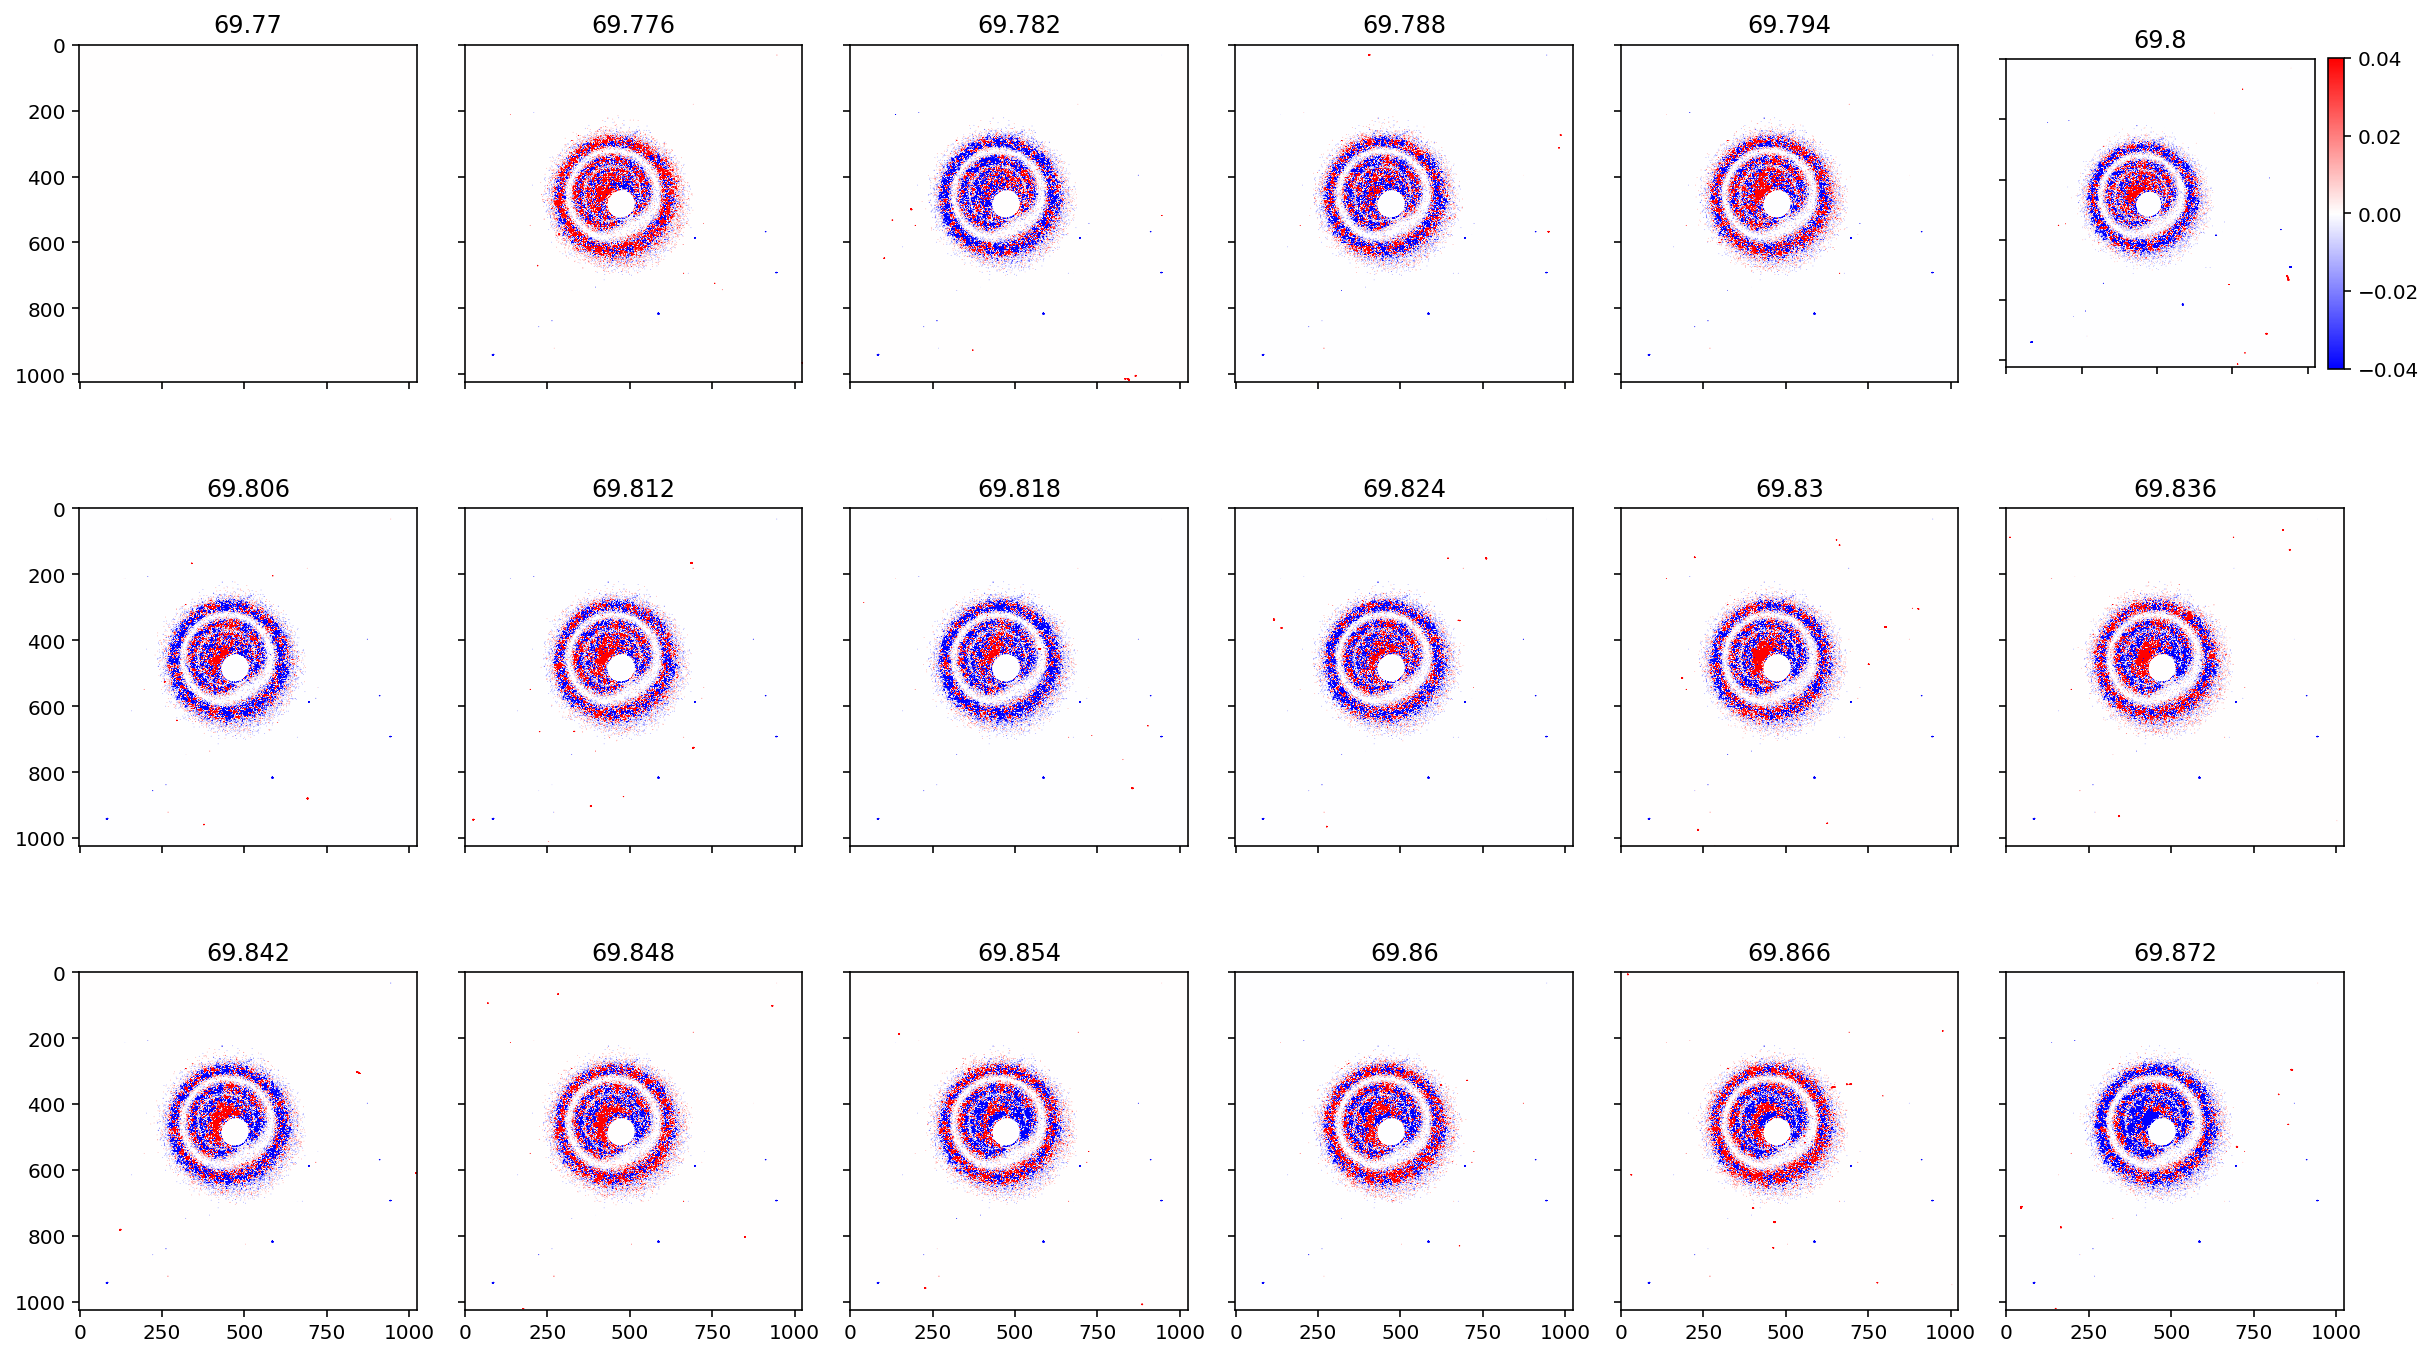

In [16]:
Nr = 3
Nc = 6
fig, axs = plt.subplots(Nr, Nc, figsize=(17,10))
cmap = cm.bwr
#cmap = cm.PuBu #  cm.PuBu_r is reversed!

images = []
cnt =0
for i in range(Nr):
    for j in range(Nc):
        # Generate data with a range that varies from one plot to the next.
        data = Exp.imgN_mean[cnt]
        print(np.min(data), np.max(data))
        images.append(axs[i, j].imshow(data, cmap=cmap, vmin=-0.04, vmax=0.04)) # need different scale for normalized imgN and unnormalized img_m
        axs[i, j].label_outer()
        axs[i, j].set_title(Exp.delays_unique[cnt])
        
        cnt +=1

plt.colorbar(images[0], ax=axs[0,Nc-1],fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

Delay_key: 028_69.77000000 	 Delay_idx: 0 	 center: 464.43,  459.40


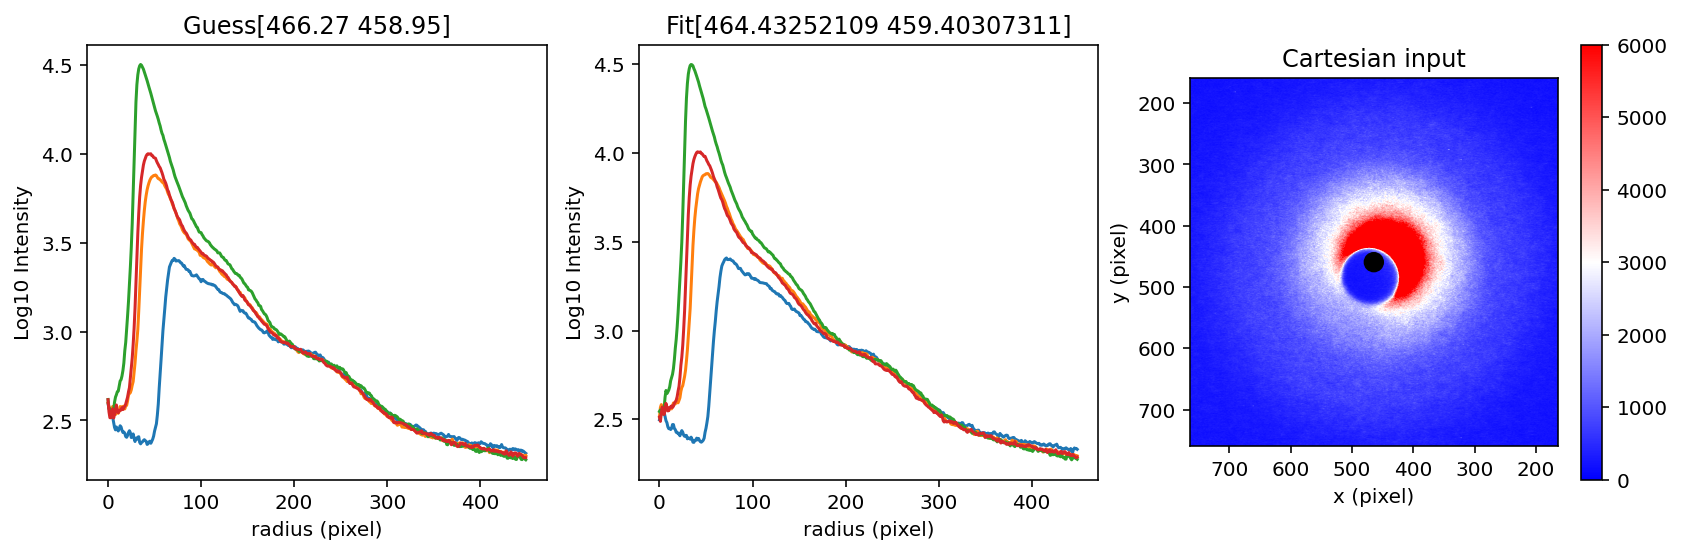

Delay_key: 059_69.77000000 	 Delay_idx: 1 	 center: 467.61,  460.71


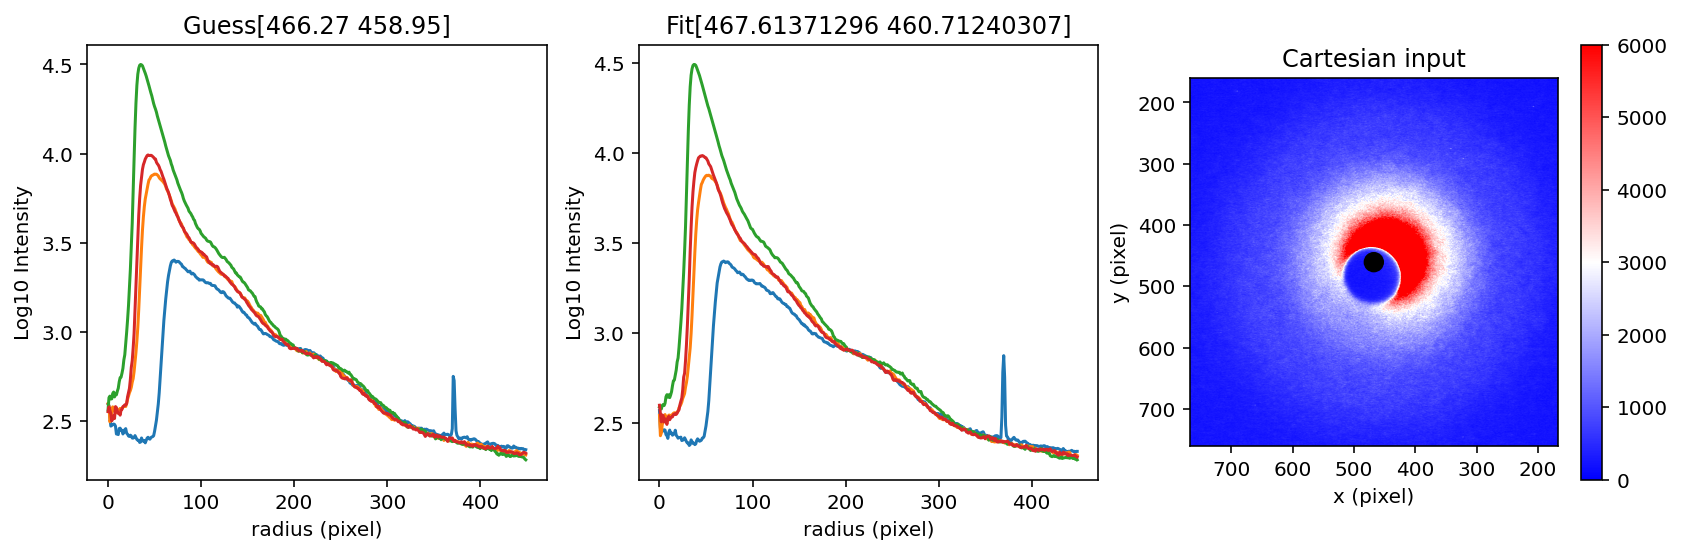

Delay_key: 090_69.77000000 	 Delay_idx: 2 	 center: 465.46,  459.23


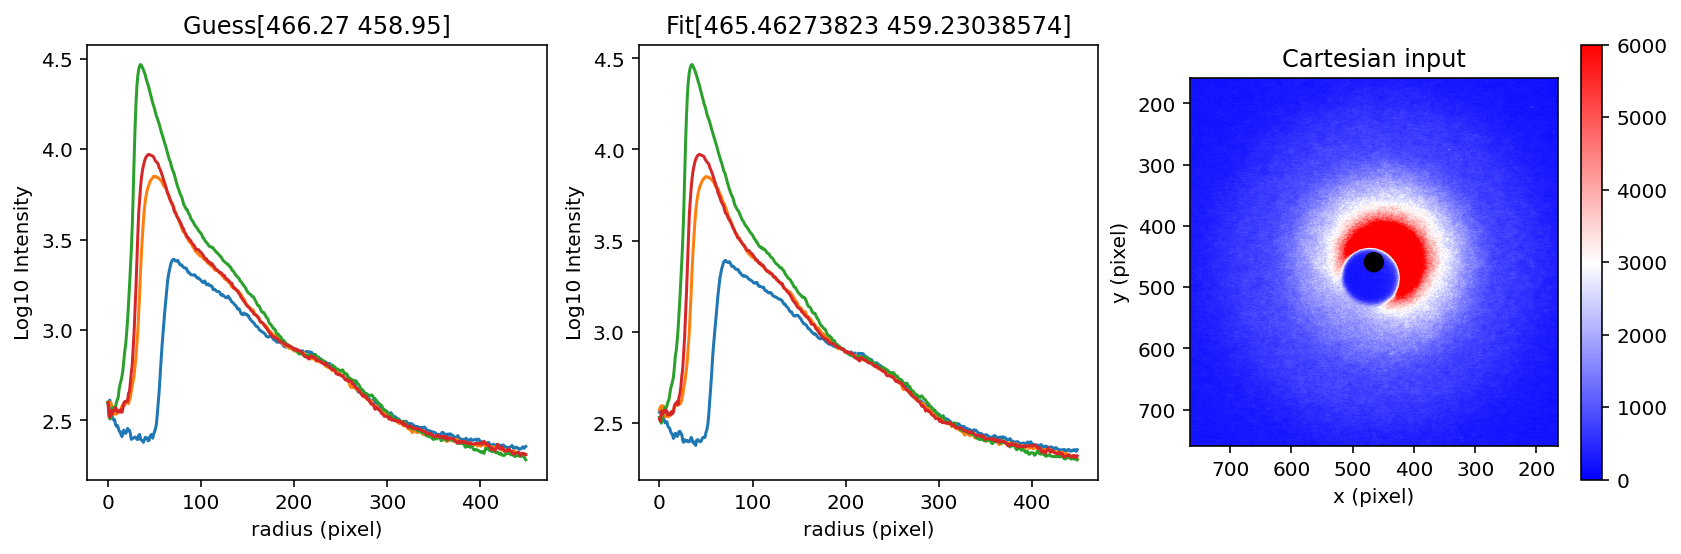

Delay_key: 121_69.77000000 	 Delay_idx: 3 	 center: 466.72,  459.00
Delay_key: 152_69.77000000 	 Delay_idx: 4 	 center: 467.49,  459.27
Delay_key: 183_69.77000000 	 Delay_idx: 5 	 center: 464.22,  458.89
Delay_key: 214_69.77000000 	 Delay_idx: 6 	 center: 465.32,  458.41
Delay_key: 245_69.77000000 	 Delay_idx: 7 	 center: 465.26,  459.34
Delay_key: 276_69.77000000 	 Delay_idx: 8 	 center: 467.15,  461.09
Delay_key: 307_69.77000000 	 Delay_idx: 9 	 center: 466.02,  460.54
Delay_key: 338_69.77000000 	 Delay_idx: 10 	 center: 466.56,  458.29
Delay_key: 026_69.77600000 	 Delay_idx: 11 	 center: 465.94,  459.29
Delay_key: 057_69.77600000 	 Delay_idx: 12 	 center: 467.82,  458.27
Delay_key: 088_69.77600000 	 Delay_idx: 13 	 center: 465.97,  459.39
Delay_key: 119_69.77600000 	 Delay_idx: 14 	 center: 467.84,  458.47
Delay_key: 150_69.77600000 	 Delay_idx: 15 	 center: 466.01,  459.47
Delay_key: 181_69.77600000 	 Delay_idx: 16 	 center: 464.20,  459.89
Delay_key: 212_69.77600000 	 Delay_idx: 1

In [21]:
# Optional to evaluate this cell, only run if you want to find center using optimize function
# It will replace values in  Exp.quads, Exp.quadsN & Exp.imgN
# Must rerun Exp.quadrants_stats() and Exp.mean_image_each_delay() to update values

centers = []
verbose = False
dtype = np.uint16 # Should be np.uint16, as Rscaling not compatible with np.float32
cmap = cm.bwr
vmin1 = 0
vmax1 = 3000
normRegion = (100,200)

for delay_key, delay_value, delay_idx in Exp.delays_i():
    
    if delay_idx < 500: # set to ~10 to test small batch first

        center = find_center(Exp, delay_idx)
        optf_grad = optimize.minimize(center.err_fn, center.center_i, method='Nelder-Mead')  
        print(f"Delay_key: {Exp.delays_i[delay_idx]} \t Delay_idx: {delay_idx} \t  center: {optf_grad.x[0]:.2f},  {optf_grad.x[1]:.2f}")
        centers.append(optf_grad.x)

        Exp.quads[delay_idx, :, :] = np.array(center.cart_to_polar_quad(optf_grad.x, Rscaling=False))
        
        intensity_in_region = np.mean(Exp.quads[delay_idx,normRegion[0]:normRegion[1]],axis=0)
        # now add normalized traces into exp object
        Exp.quadsN[delay_idx] = Exp.quads[delay_idx] / intensity_in_region
        Exp.imgN[delay_idx]   = Exp.img_m[delay_idx] / np.mean(intensity_in_region)

        if (verbose == True) or (delay_idx < 3):
            fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(14,4))
            ax1.plot(np.log10(center.cart_to_polar_quad(center.center_i)))
            ax1.set_title('Guess' + str(center.center_i)), ax1.set_xlabel('radius (pixel)'), ax1.set_ylabel('Log10 Intensity')

            #Use selected quadrants for optimiziation: useQuadrants=(1,2,3) 
            ax2.plot(np.log10(center.cart_to_polar_quad(optf_grad.x) ))
            ax2.set_title('Fit' + str(optf_grad.x)), ax2.set_xlabel('radius (pixel)'), ax2.set_ylabel('Log10 Intensity')

            cartim = ax3.imshow(center.cart, vmin=vmin1, vmax=vmax1*2, cmap=cmap, origin = 'lower')
            ax3.set_title('Cartesian input'), ax3.set_xlabel('x (pixel)'), ax3.set_ylabel('y (pixel)')
            cart_pix = 300
            ax3.set_xlim(optf_grad.x[0]+cart_pix,optf_grad.x[0]-cart_pix)
            ax3.set_ylim(optf_grad.x[1]+cart_pix,optf_grad.x[1]-cart_pix)
            ax3.add_patch(Circle(optf_grad.x, radius=15, color='black'))
            plt.colorbar(cartim, ax=ax3)

            plt.show()


Exp.quadrants_stats()
Exp.mean_image_each_delay()    

Mean x:  466.38, y:  459.01


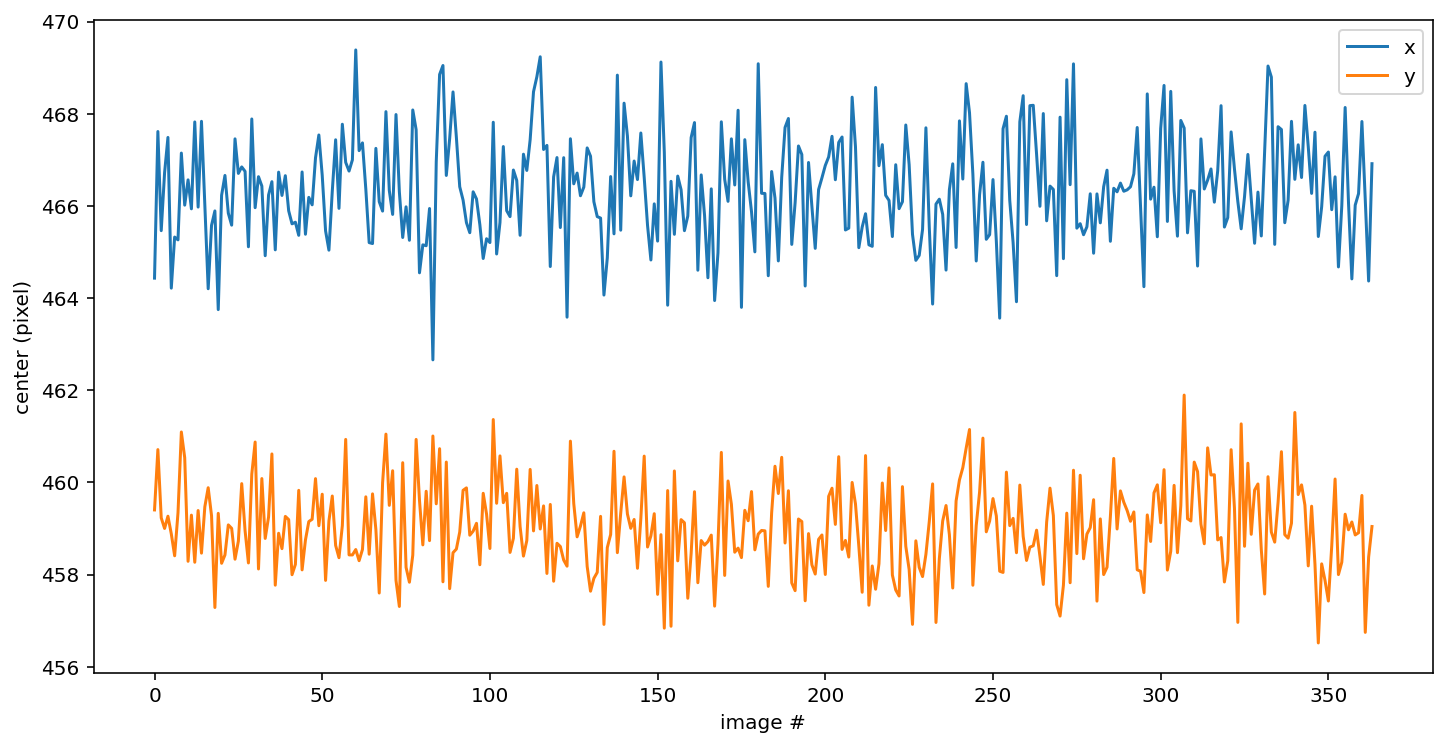

In [22]:
x = np.array(centers)[:,0] 
y = np.array(centers)[:,1]
print(f"Mean x: {np.mean(x): .2f}, y: {np.mean(y): .2f}")

fig, ax = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(x, label='x')
plt.plot(y, label='y')
plt.legend()
ax.set_xlabel('image #')
ax.set_ylabel('center (pixel)')

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)
    ax.set_xlabel('x (pixel)'), ax.set_ylabel('y (pixel)')

    # now determine nice limits by hand:
    binwidth = 0.1
    xymax = max(np.max(x), np.max(y))
    xymin = max(np.min(x), np.min(y))
    #lim = (int(xymax/binwidth) + 1) * binwidth

    binsx = np.arange(np.min(x), np.max(x), binwidth)
    binsy = np.arange(np.min(y), np.max(y), binwidth)
    ax_histx.hist(x, bins=binsx)
    ax_histy.hist(y, bins=binsy, orientation='horizontal')

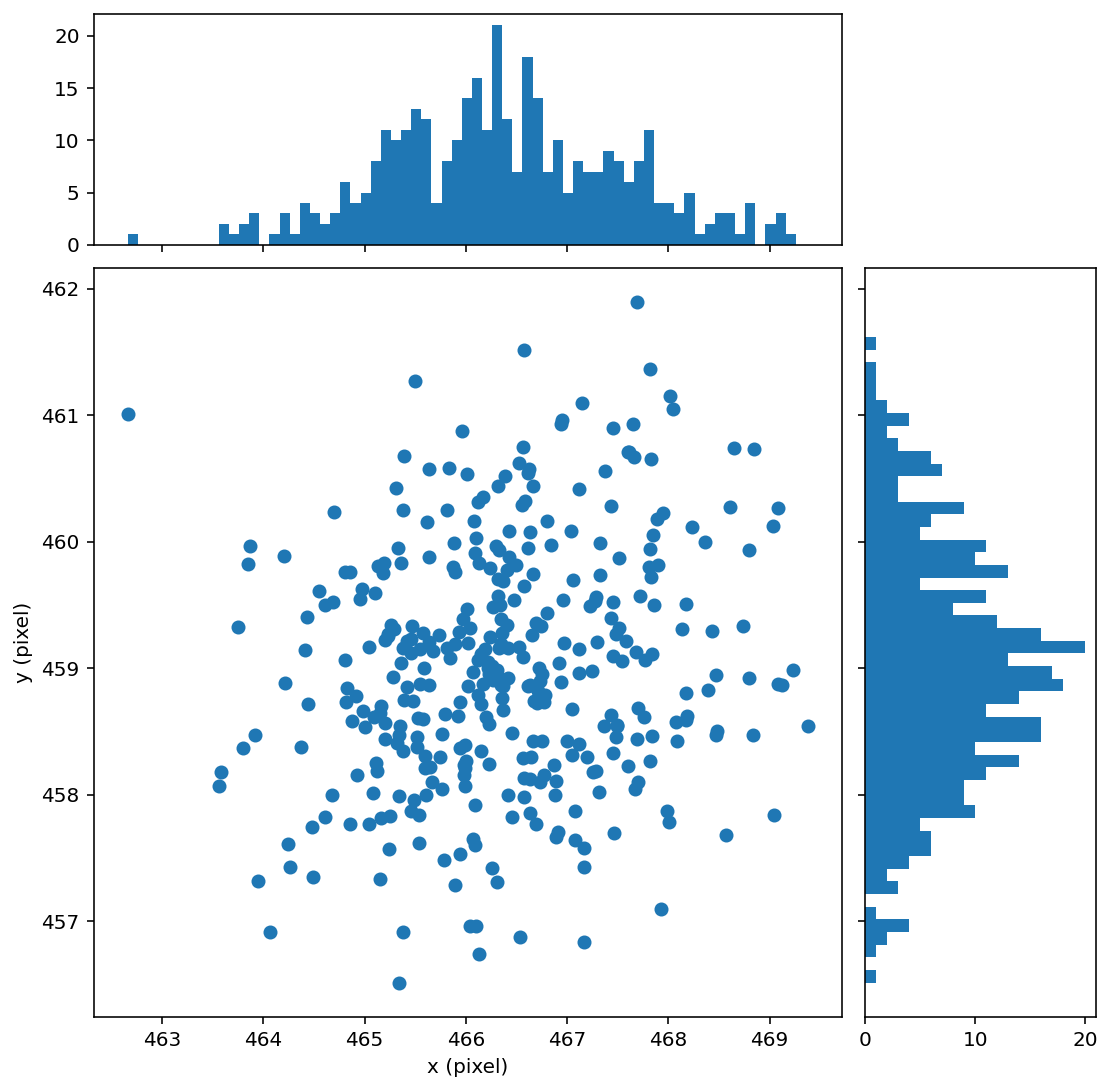

In [23]:
# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(x, y, ax, ax_histx, ax_histy)

plt.show()
#plt.savefig('center_all_images_Rscaling=False.pdf')

In [24]:
# (unique delays ~31 x  maxRadius ~450 x quadrants ~4), N = normalized
Exp.meanquadsN.shape

(31, 450, 4)

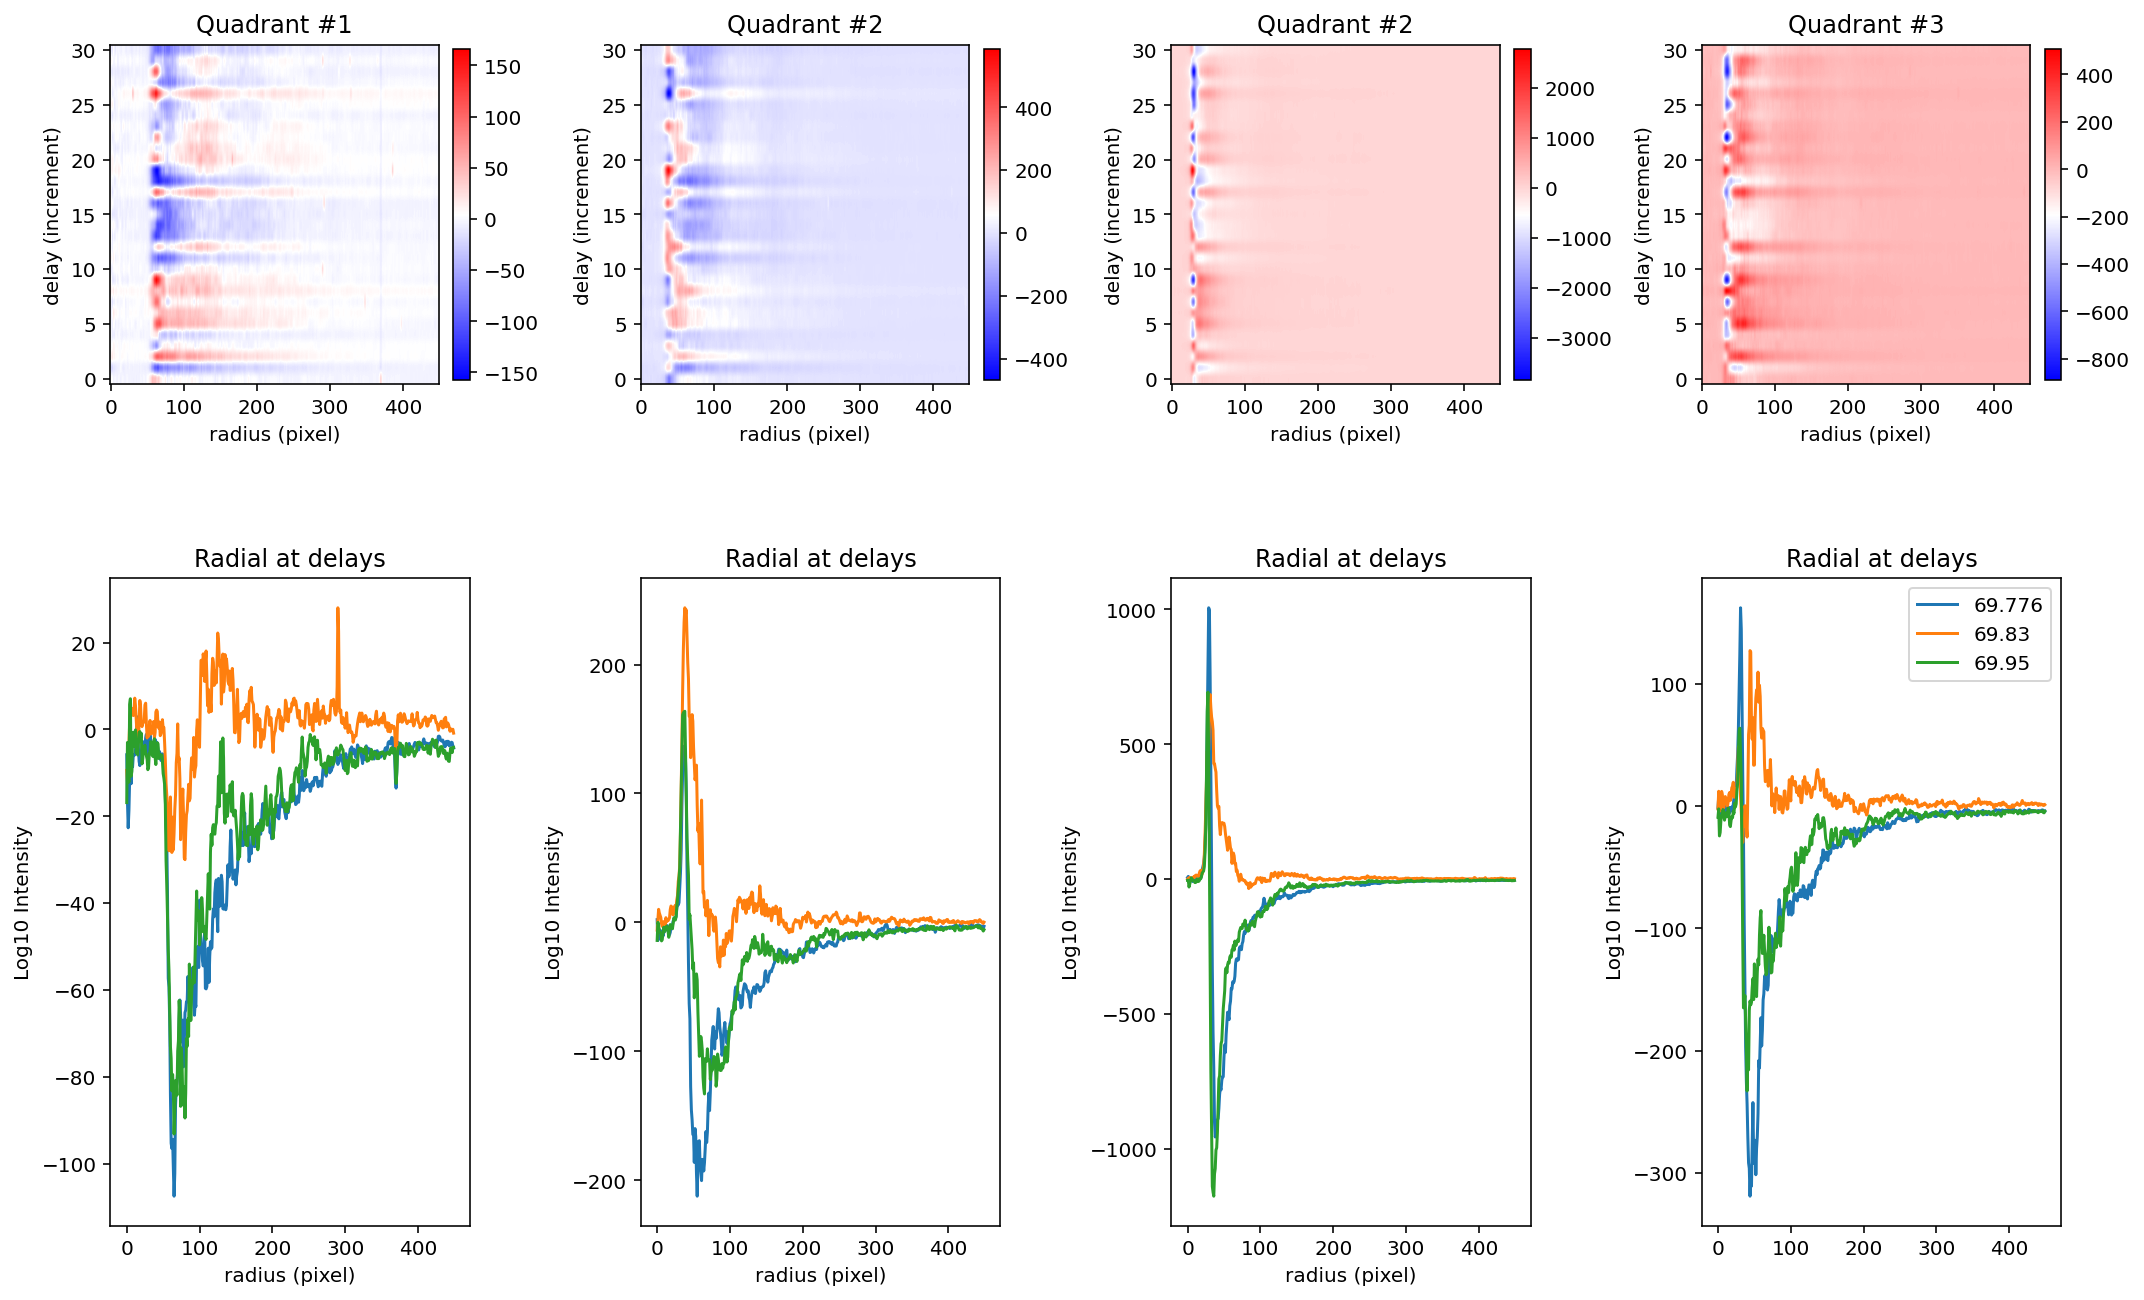

In [25]:
cart_pix = 300
delays = [1, 10, 30]
labels = [f'{Exp.delays_unique[step]}' for step in delays]

# vmin=vmin1, vmax=vmax1*2,
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(ncols=4, nrows = 2, figsize=(15,10))

cartim1 = ax1.imshow(Exp.meanquads[:,:,0]-np.mean(Exp.meanquads[0:5,:,0],axis=0), cmap=cmap, origin='lower', aspect=15)
ax1.set_title('Quadrant #1'), ax1.set_xlabel('radius (pixel)'), ax1.set_ylabel('delay (increment)')

cartim2 = ax2.imshow(Exp.meanquads[:,:,1]-np.mean(Exp.meanquads[0:5,:,1],axis=0), cmap=cmap, origin='lower', aspect=15)
ax2.set_title('Quadrant #2'), ax2.set_xlabel('radius (pixel)'), ax2.set_ylabel('delay (increment)')

cartim3 = ax3.imshow(Exp.meanquads[:,:,2]-np.mean(Exp.meanquads[0:5,:,2],axis=0), cmap=cmap, origin='lower', aspect=15)
ax3.set_title('Quadrant #2'), ax3.set_xlabel('radius (pixel)'), ax3.set_ylabel('delay (increment)')

cartim4 = ax4.imshow(Exp.meanquads[:,:,3]-np.mean(Exp.meanquads[0:5,:,3],axis=0), cmap=cmap, origin='lower', aspect=15)
ax4.set_title('Quadrant #3'), ax4.set_xlabel('radius (pixel)'), ax4.set_ylabel('delay (increment)')

plt.colorbar(cartim1, ax=ax1, fraction=0.046, pad=0.04)
plt.colorbar(cartim2, ax=ax2, fraction=0.046, pad=0.04)
plt.colorbar(cartim3, ax=ax3, fraction=0.046, pad=0.04)
plt.colorbar(cartim4, ax=ax4, fraction=0.046, pad=0.04)
        
ax5.plot(np.transpose(Exp.meanquads[delays,:,0]-np.mean(Exp.meanquads[0:5,:,0],axis=0)))
ax5.set_title('Radial at delays'), ax5.set_xlabel('radius (pixel)'), ax5.set_ylabel('Log10 Intensity')#, ax5.set_aspect(0.03)
         
ax6.plot(np.transpose(Exp.meanquads[delays,:,1]-np.mean(Exp.meanquads[0:5,:,1],axis=0)))
ax6.set_title('Radial at delays'), ax6.set_xlabel('radius (pixel)'), ax6.set_ylabel('Log10 Intensity')#, ax6.set_aspect('auto')

ax7.plot(np.transpose(Exp.meanquads[delays,:,2]-np.mean(Exp.meanquads[0:5,:,2],axis=0)))
ax7.set_title('Radial at delays'), ax7.set_xlabel('radius (pixel)'), ax7.set_ylabel('Log10 Intensity')#, ax6.set_aspect('auto')

ax8.plot(np.transpose(Exp.meanquads[delays,:,3]-np.mean(Exp.meanquads[0:5,:,3],axis=0)))
ax8.set_title('Radial at delays'), ax7.set_xlabel('radius (pixel)'), ax8.set_ylabel('Log10 Intensity')#, ax4.set_aspect(1)
ax8.legend(labels)            
    
plt.tight_layout()
plt.show()

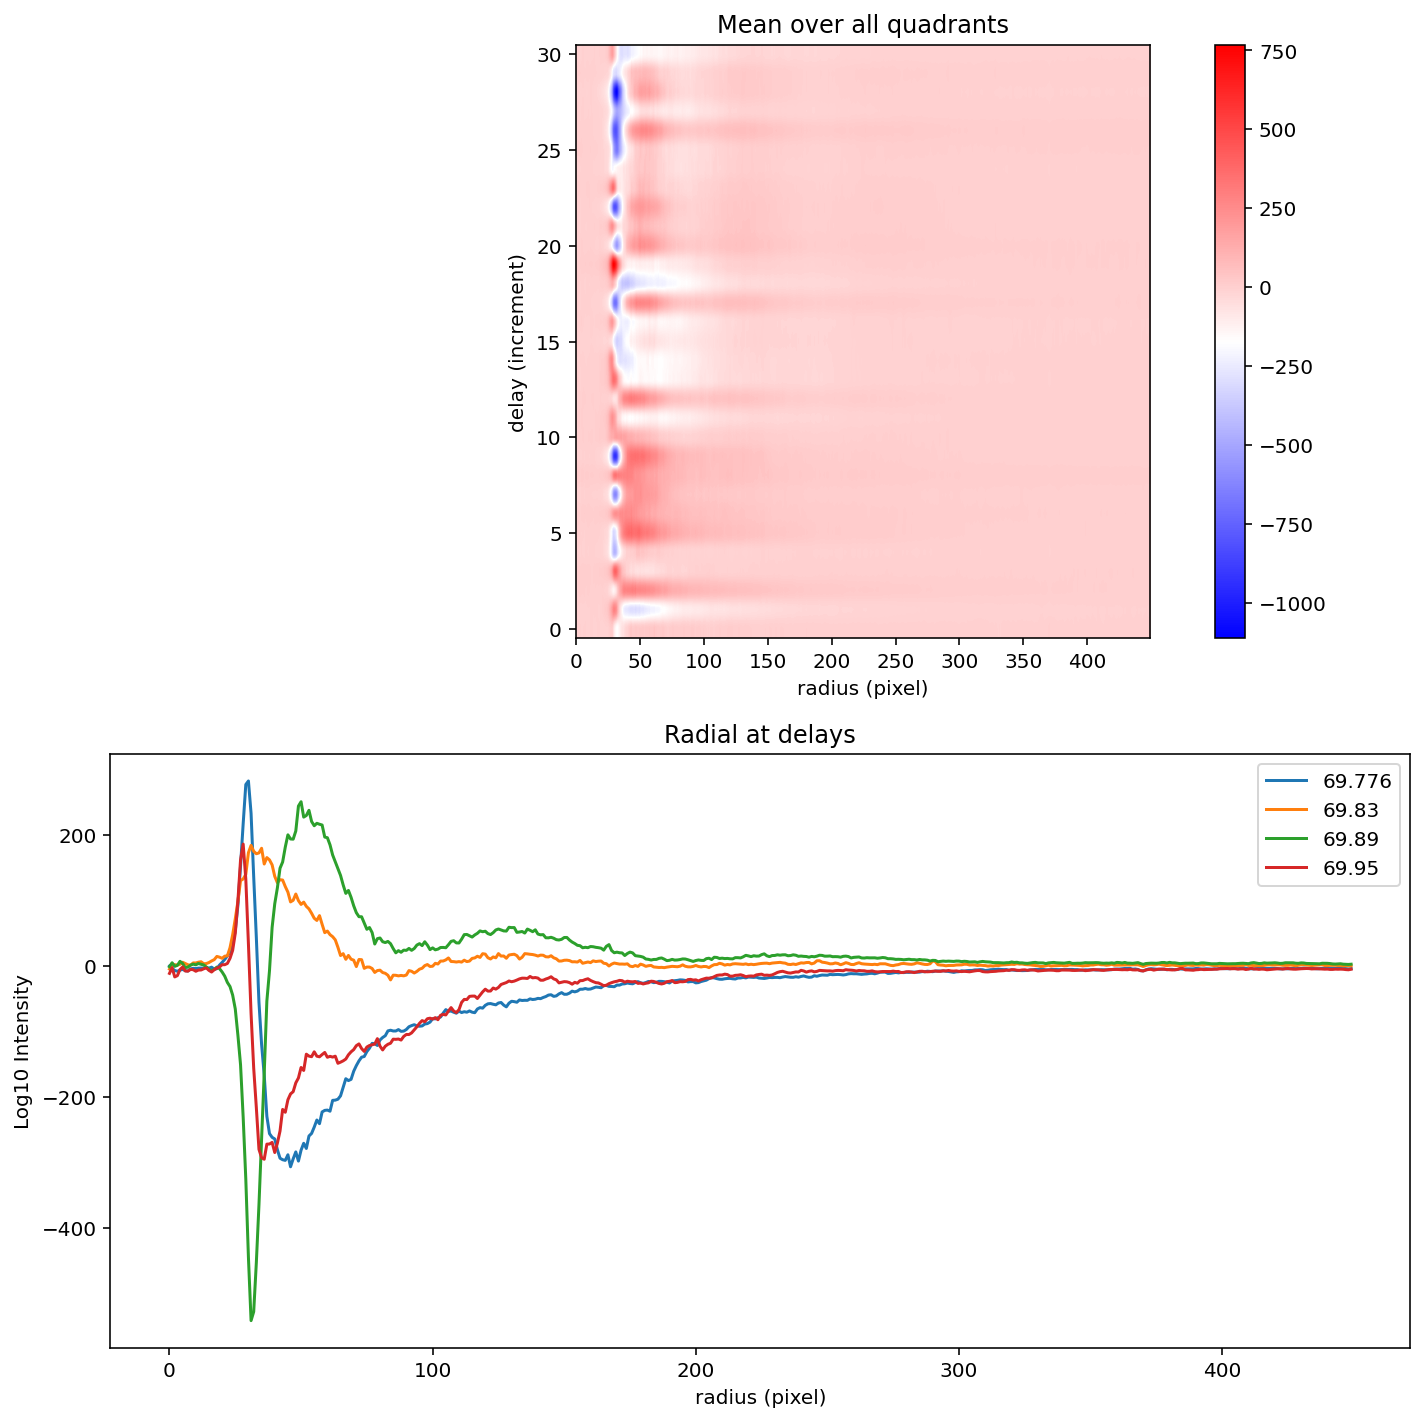

In [26]:
cart_pix = 300
delays = [1, 10, 20, 30]
labels = [f'{Exp.delays_unique[step]}' for step in delays]

# vmin=vmin1, vmax=vmax1*2,
fig, ((ax1), (ax4)) = plt.subplots(ncols=1, nrows = 2, figsize=(10,10))

cartim1 = ax1.imshow(np.mean(Exp.meanquads[:,:,:],axis=2)-np.mean(Exp.meanquads[0:5,:,:],axis=(0,2)), cmap=cmap, origin='lower', aspect=15)
ax1.set_title('Mean over all quadrants'), ax1.set_xlabel('radius (pixel)'), ax1.set_ylabel('delay (increment)')

plt.colorbar(cartim1, ax=ax1)

ax4.plot(np.transpose(np.mean(Exp.meanquads[delays,:,:],axis=2)-np.mean(Exp.meanquads[0:5,:,:],axis=(0,2))))
ax4.set_title('Radial at delays'), ax4.set_xlabel('radius (pixel)'), ax4.set_ylabel('Log10 Intensity')#, ax4.set_aspect(1)
ax4.legend(labels)  

plt.tight_layout()
plt.show()

subtracting delays 0 through 3
0.17289903016836103 1.9613660107997948 0.5763545683017652
0.13300419553885157 4.791760067261101 0.8467047256348419
0.10540118078044018 16.233637748083968 1.4793107661045444
0.13259456044140847 6.159962405119271 0.9540248915408163


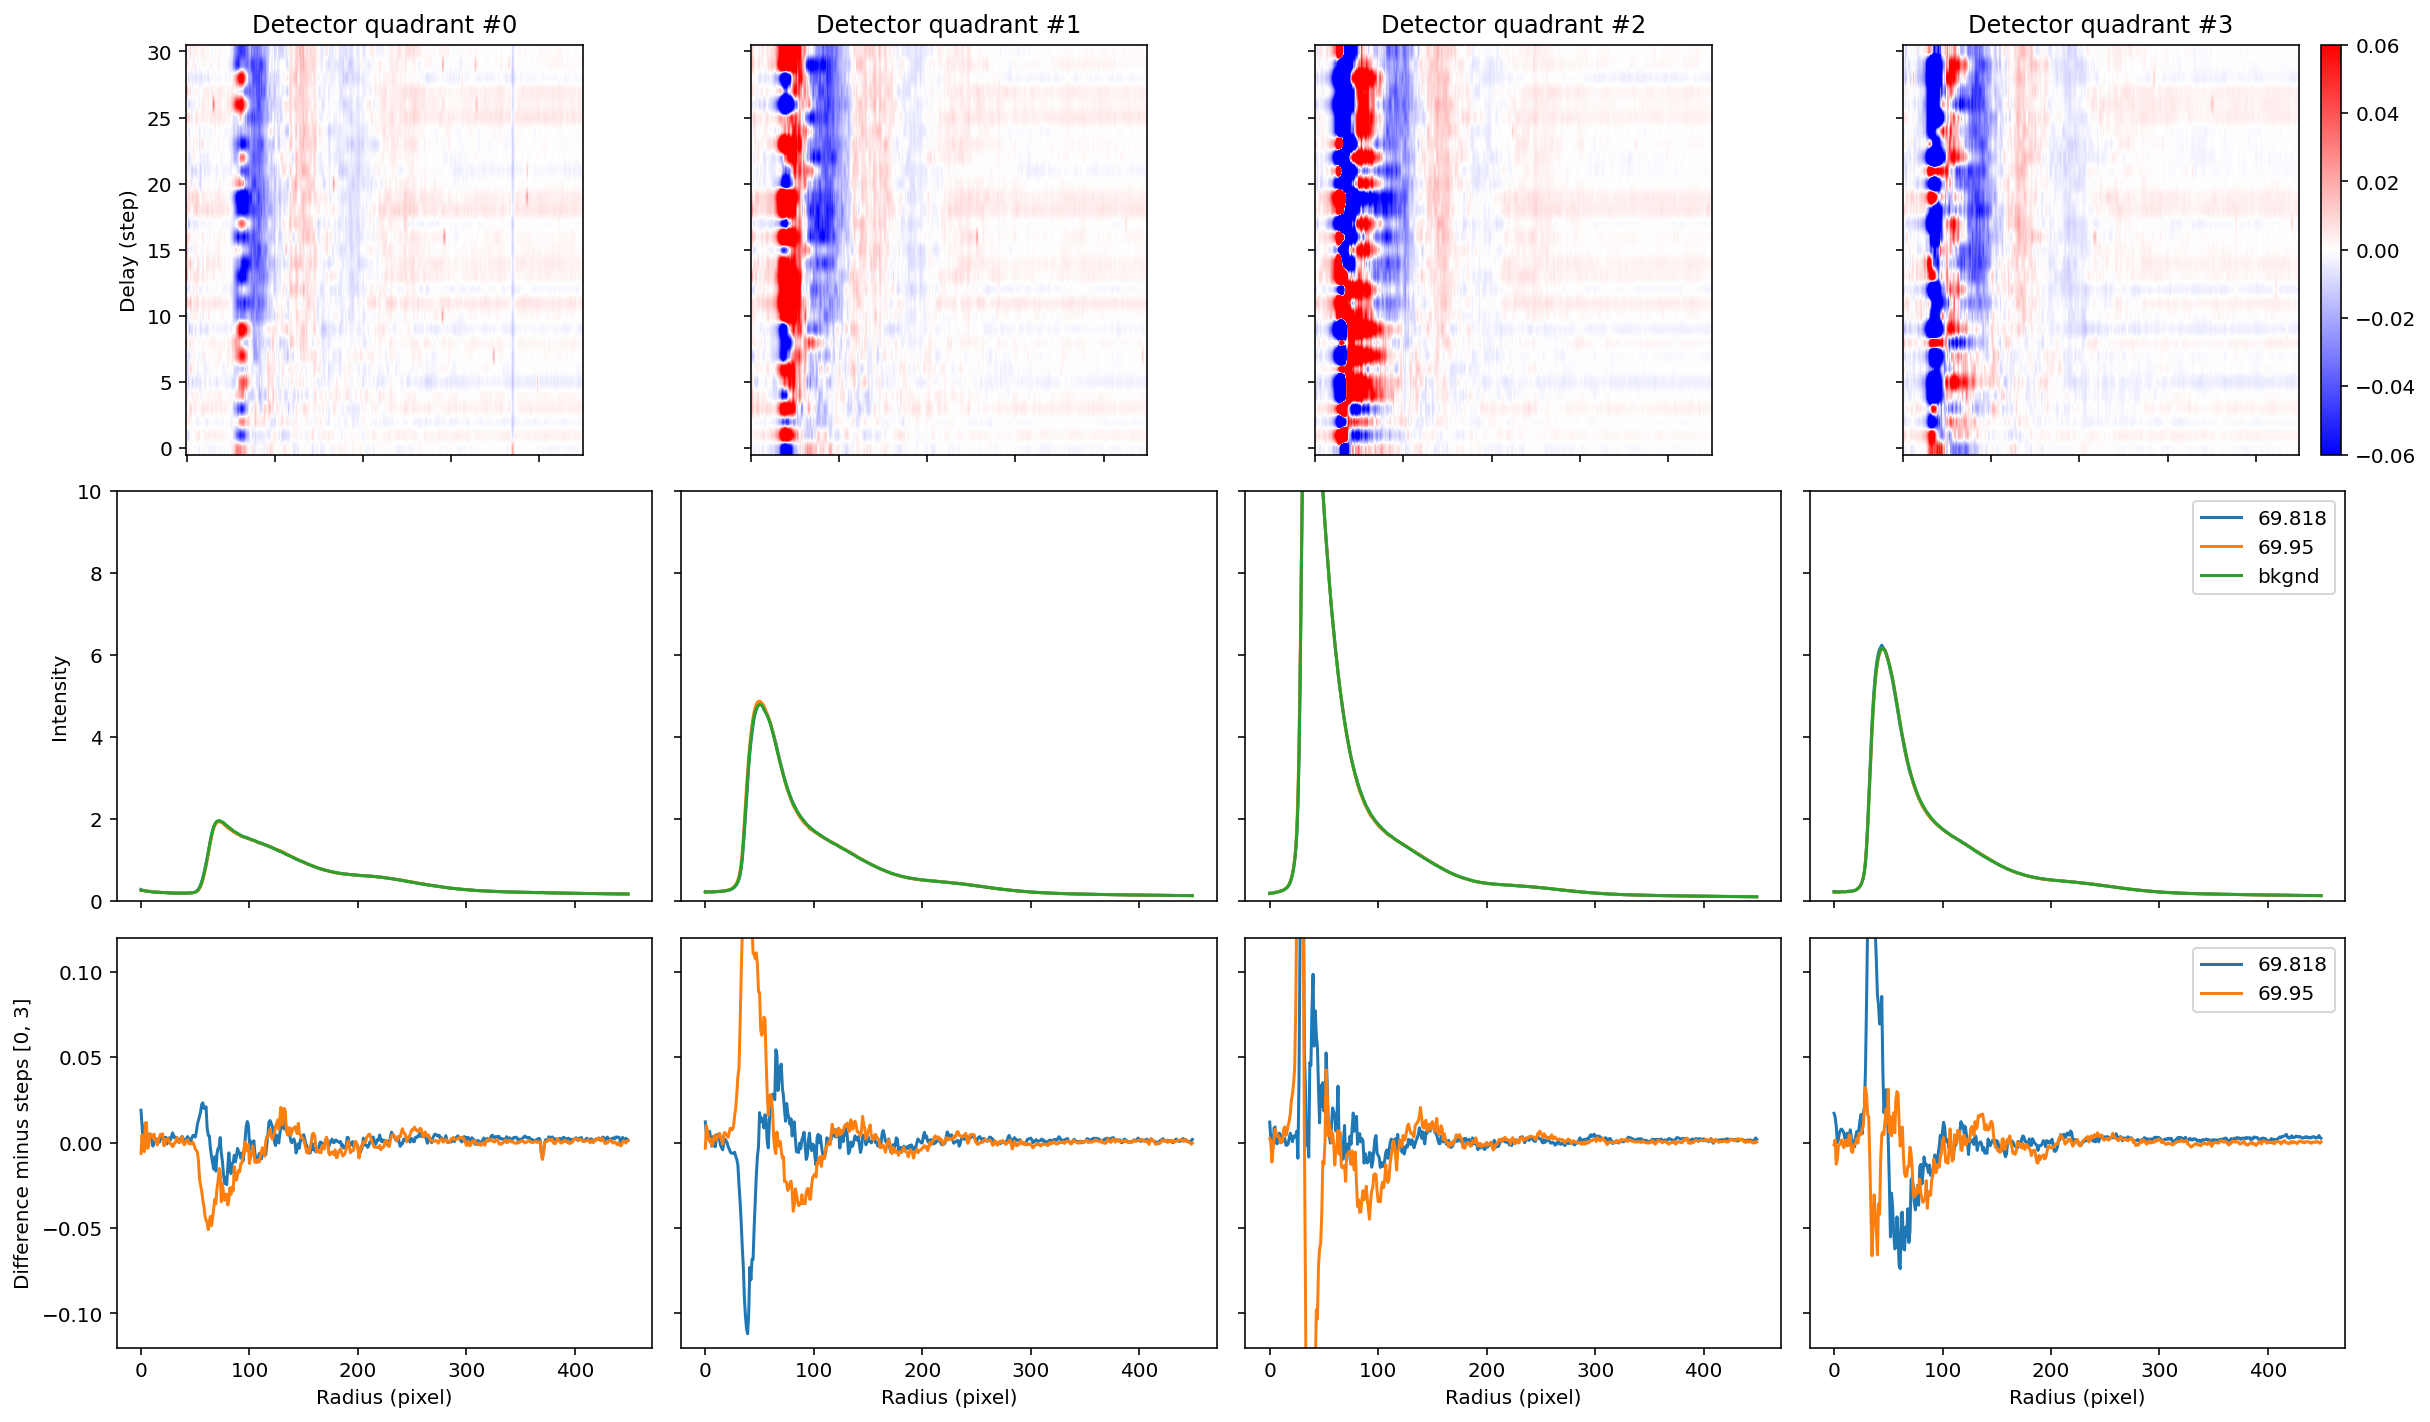

In [27]:
# BUG: why does running this script twice make bottom panel work? 
# BUG: The green background trace should not be zero, why does changing bkgnd_delays range fix it?

# Normalization helpful to visualize data
# Might need to use gridspec to control spacing and aspect ratio https://matplotlib.org/3.1.0/tutorials/intermediate/gridspec.html

delays = [8,  30]
labels = [f'{Exp.delays_unique[step]}' for step in delays]
bkgnd_delays = [0,3]
print(f"subtracting delays {bkgnd_delays[0]} through {bkgnd_delays[1]}")

vmin, vmax = -0.06, 0.06
sub = True # see nothing without subtracting!
cmap = cm.bwr  #cmap = cm.PuBu_r

Nc = 4
fig, axs = plt.subplots(3, Nc, figsize=(17, 10))

images = []
cnt = 0

for quad in range(Nc):
        # Generate data with a range that varies from one plot to the next.
        data = []
        data2 = []
        data  = Exp.meanquadsN[:,:,quad].copy() # crucial we copy here or we just get a reference and then below edit it with -= !!!!
        data2 = Exp.meanquadsN[delays,:,quad].copy()
        
        bkgnd = []
        bkgnd = np.mean(Exp.meanquadsN[bkgnd_delays[0]:bkgnd_delays[1], :, quad].copy(),axis=0)
        print(np.min(bkgnd), np.max(bkgnd), np.mean(bkgnd))
        data_sub  = data - bkgnd
        data2_sub = data2 - bkgnd
            
        pltq = images.append(axs[0, quad].imshow(data_sub, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower', aspect=15))
        images.append(axs[1, quad].plot(np.transpose(data2)))
        images.append(axs[1, quad].plot(np.transpose(bkgnd))) # uncomment to plot the background contribution subtracted
        images.append(axs[2, quad].plot(np.transpose(data2_sub)))

        axs[0,quad].set_title('Detector quadrant #' + str(quad))
        axs[0,quad].set_xlabel('Radius (pixel)')
        axs[0,quad].set_ylabel('Delay (step)')
        axs[0,quad].label_outer()
        axs[1,quad].set_xlabel('Radius (pixel)')
        axs[1,quad].set_ylabel('Intensity')
        axs[1,quad].label_outer()
        axs[1,quad].set_ylim(0,10)         
        axs[2,quad].set_xlabel('Radius (pixel)')
        axs[2,quad].set_ylabel(f'Difference minus steps {bkgnd_delays}')
        axs[2,quad].label_outer()
        axs[2,quad].set_ylim(-0.12,0.12)
        
        cnt +=1
        
#plt.colorbar(images[0], ax=axs[0,0],fraction=0.046, pad=0.04)
#plt.colorbar(images[0], ax=axs[0,1],fraction=0.046, pad=0.04)
#plt.colorbar(images[0], ax=axs[0,2],fraction=0.046, pad=0.04)
plt.colorbar(images[0], ax=axs[0,3],fraction=0.046, pad=0.04)
fig.tight_layout()
axs[1,3].legend(labels + ['bkgnd'])
axs[2,3].legend(labels)
plt.show()
fig.savefig("quadpanel_Oct23_ued_fit_center.pdf")  

In [28]:
Exp.quadsN.shape

(364, 450, 4)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]
[234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245]


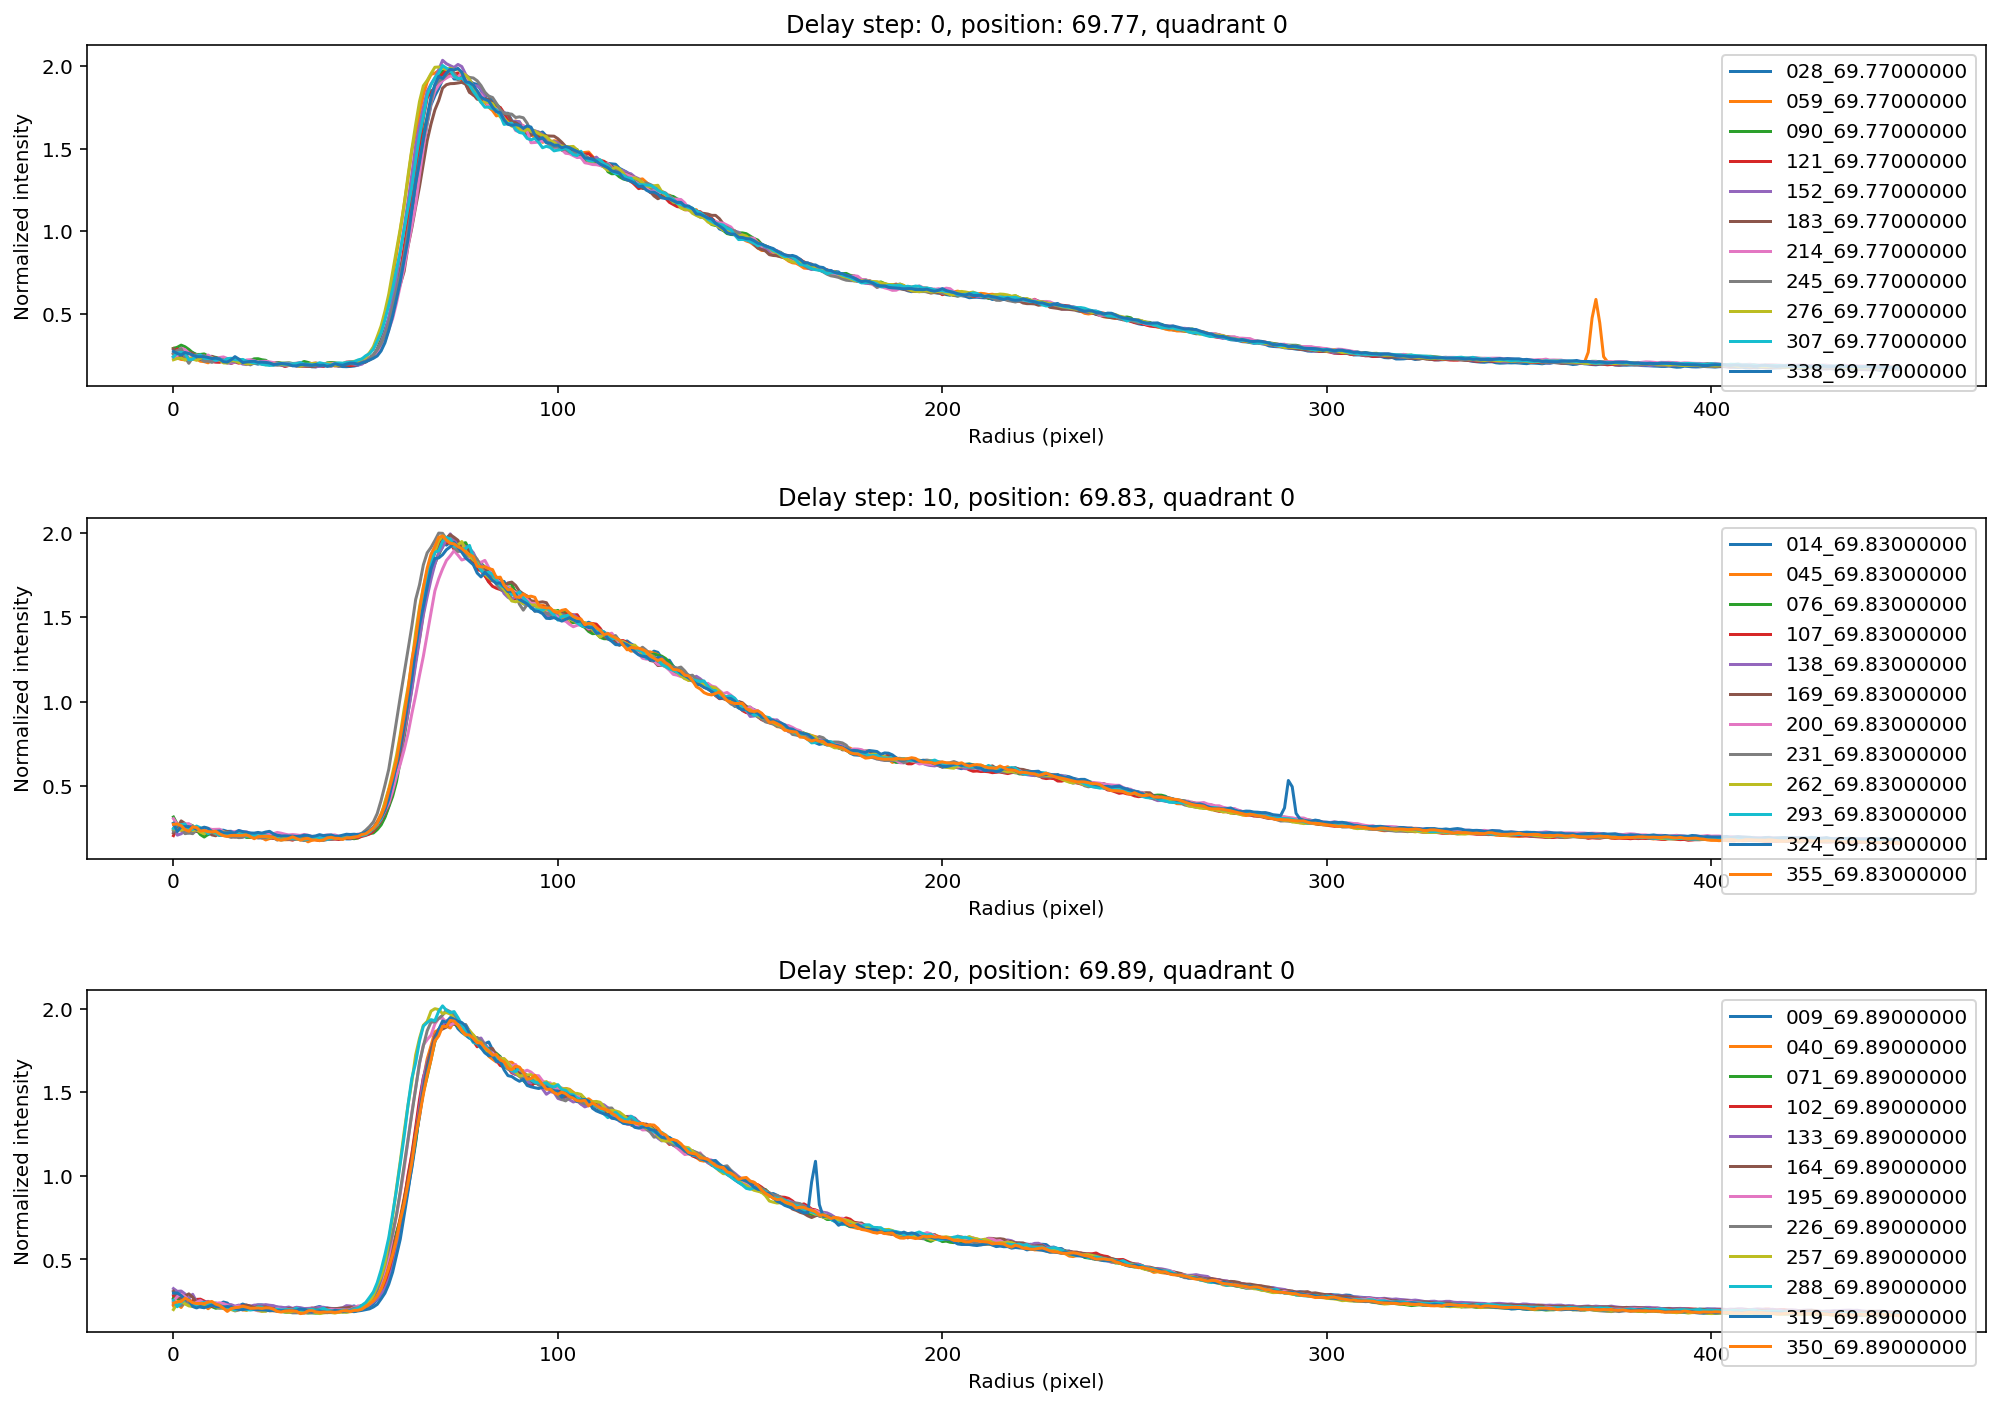

In [37]:
# want run diagnostics, compare normalized quadrants at a single delay stage position

quadrant = 0
delay_step = [0, 10, 20]
fig, axs = plt.subplots(len(delay_step), 1, figsize=(14, 10))
cnt = 0
subtract_mean = False

for idx, delay_unique in enumerate(Exp.delays_unique):
    #print(idx, delay_unique)
    if idx in delay_step:
        delay_indices = Exp.delays_dict[delay_unique]
        print(delay_indices)
        labels = [Exp.delays_i[i] for i in delay_indices]
        d     = Exp.quadsN[delay_indices,:,quadrant].copy()
        if subtract_mean:
            d     -= Exp.meanquadsN[idx, :, quadrant].copy()
            
        axs[cnt].plot(np.transpose(d))
        axs[cnt].legend(labels)
        axs[cnt].set_title(f'Delay step: {delay_step[cnt]}, position: {Exp.delays_unique[delay_step[cnt]]}, quadrant {quadrant}')
        axs[cnt].set_ylabel(f'Normalized intensity')
        axs[cnt].set_xlabel('Radius (pixel)')
        cnt += 1


plt.tight_layout()

0 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
10 [117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]
20 [234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245]


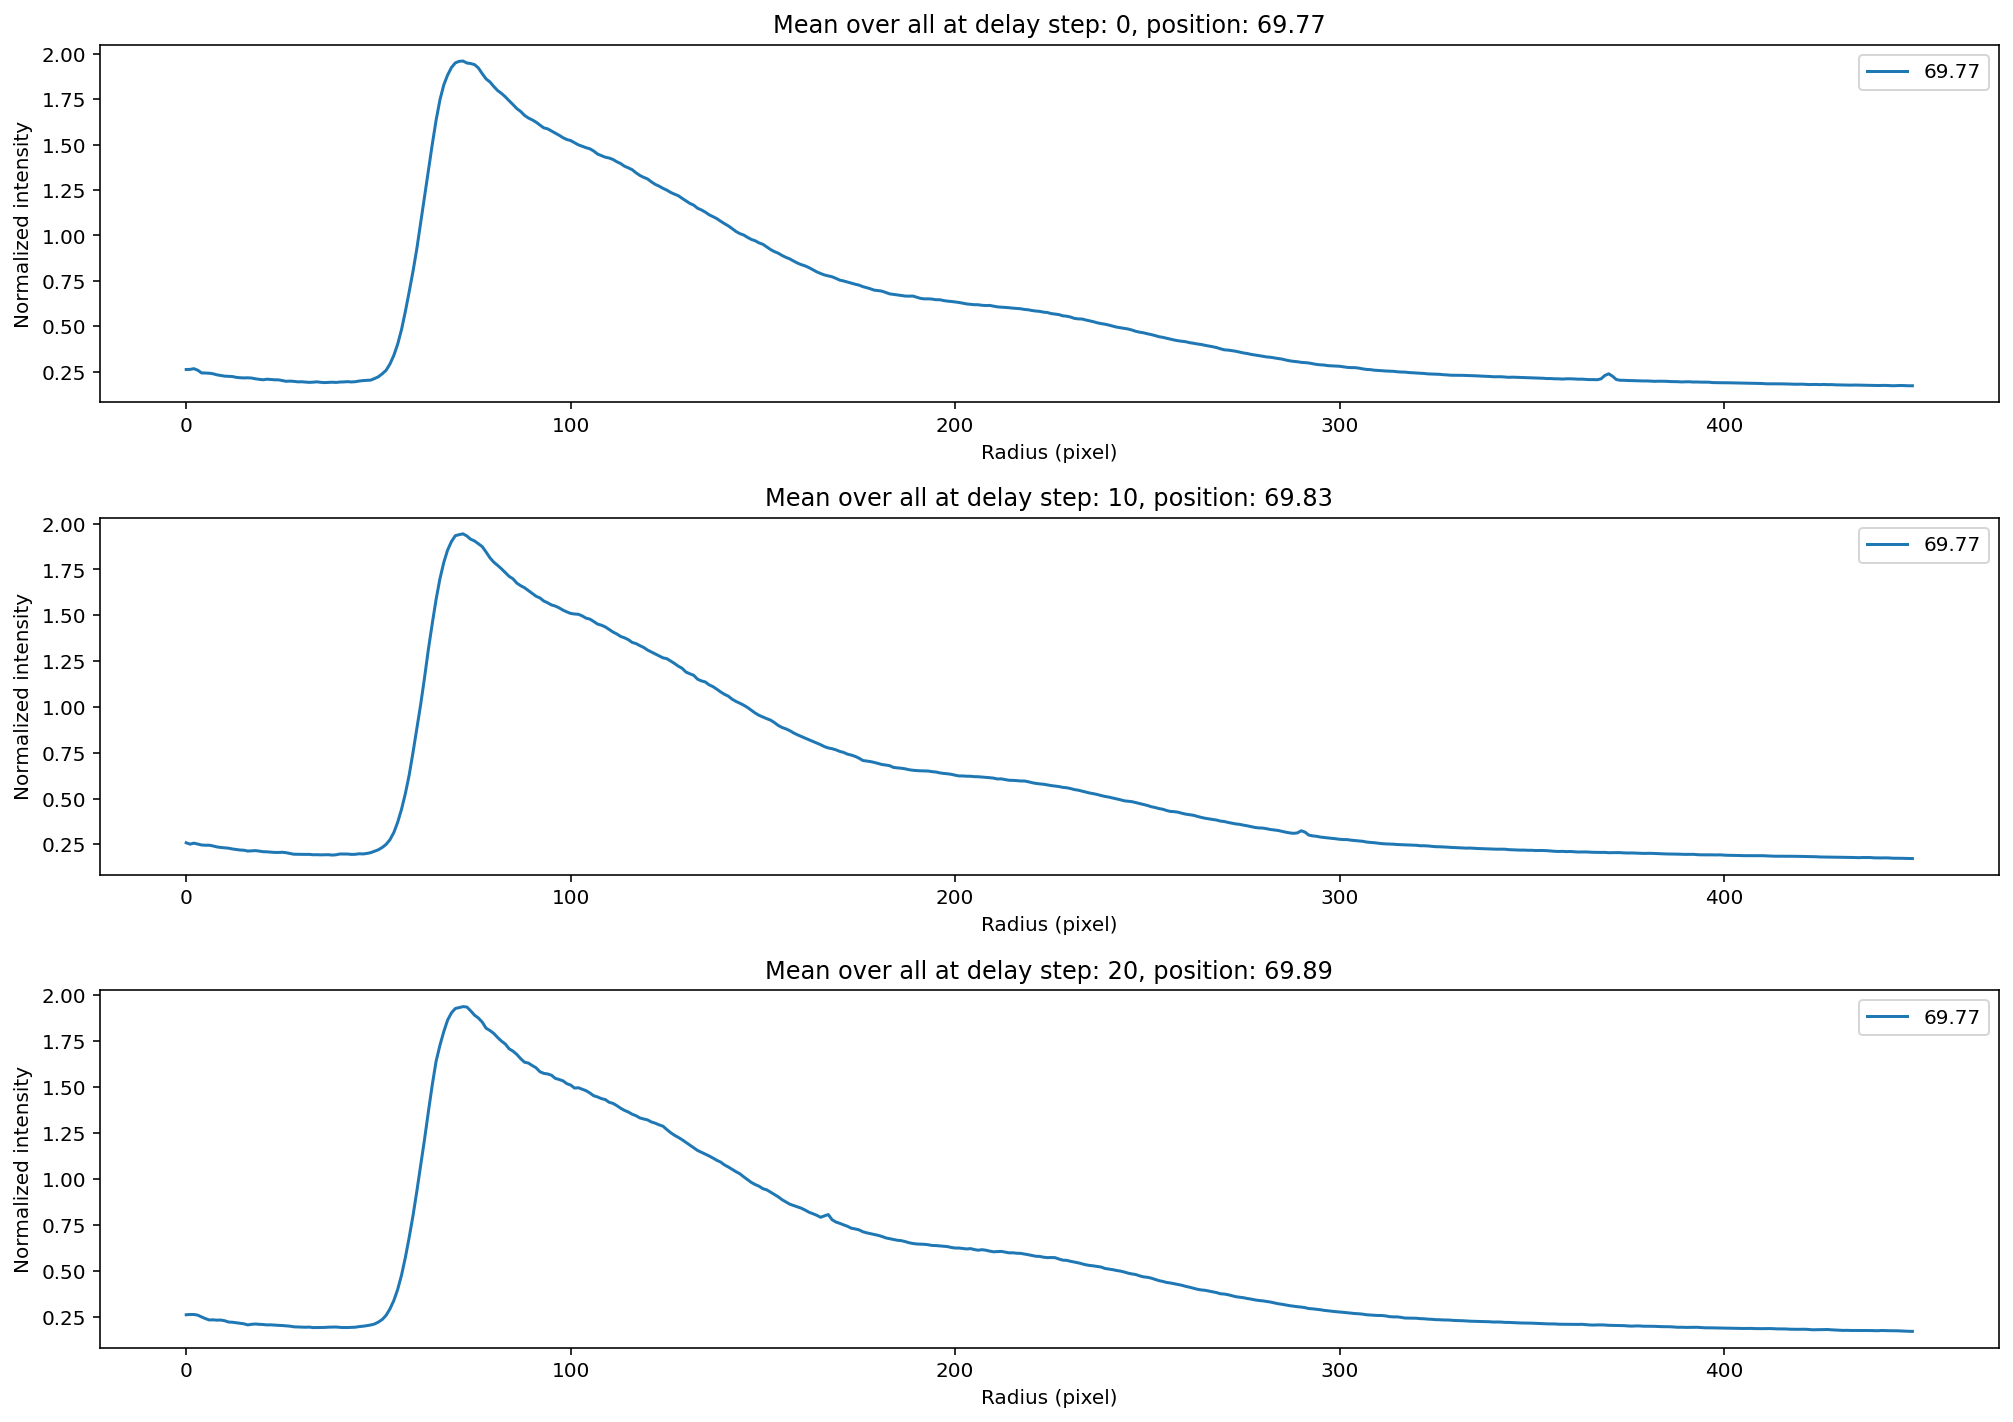

In [41]:
# Mean radial profiel for a specified quadrant and delay

quadrant = 0
delay_step = [0, 10, 20]
fig, axs = plt.subplots(len(delay_step), 1, figsize=(14, 10))
cnt = 0

for idx, delay_unique in enumerate(Exp.delays_unique):
    #print(idx, delay_unique)
    if idx in delay_step:
        delay_indices = Exp.delays_dict[delay_unique]
        print(idx, delay_indices)
        labels = Exp.delays_unique[delay_step]
        d =  Exp.meanquadsN[idx, :, quadrant].copy()
        axs[cnt].plot(np.transpose(d))
        axs[cnt].legend(Exp.delays_unique[delay_step])
        axs[cnt].set_title(f'Mean over all at delay step: {delay_step[cnt]}, position: {Exp.delays_unique[delay_step[cnt]]}')
        axs[cnt].set_ylabel(f'Normalized intensity')
        axs[cnt].set_xlabel('Radius (pixel)')
        cnt += 1
        
plt.tight_layout()